<a href="https://colab.research.google.com/github/mikebbo/mldata/blob/main/WalmartDemand_Forecasting2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

User
@@1. Demand Forecasting: Let's start by the first one, guide me step by step
ChatGPT
Certainly! Demand forecasting is a crucial aspect of many businesses, including online retail. In this example, we'll guide you through the steps to create a simple demand forecasting model using machine learning.

##Step 1: Understand the Problem
Define the scope of your demand forecasting model. What products or categories do you want to forecast? Are there specific time periods you are interested in (e.g., weekly, monthly)?
Gather historical sales data for the selected products/categories.

##Step 2: Data Preprocessing
Load your historical sales data into a dataset. This dataset should include relevant features such as date, product ID, and sales quantity.
Handle missing data and outliers appropriately.
If your data is not in time-series format, create a time-series dataset with timestamps and corresponding sales quantities.
##Step 3: Exploratory Data Analysis (EDA)
Visualize your data to understand trends, seasonality, and any patterns.
Use statistical measures to understand the central tendency and dispersion of the data.
Identify any external factors (holidays, promotions) that may impact demand.
##Step 4: Feature Engineering
Extract relevant features from your timestamp data, such as day of the week, month, and year.
Consider lag features (past sales values) to capture trends and seasonality.
Create dummy variables for categorical features.
##Step 5: Train-Test Split
Split your dataset into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance.
##Step 6: Choose a Model
Select a suitable machine learning model for time-series forecasting. Common choices include:
ARIMA (AutoRegressive Integrated Moving Average)
SARIMA (Seasonal ARIMA)
Prophet
LSTM (Long Short-Term Memory) networks
##Step 7: Model Training
Train your chosen model using the training dataset.
Tune hyperparameters if necessary.
Evaluate the model's performance on the testing set.
##Step 8: Model Evaluation
Use metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE) to assess the model's accuracy.
Visualize the model's predictions against the actual values.
##Step 9: Fine-Tuning
If the model performance is not satisfactory, consider fine-tuning the model by adjusting parameters or trying a different model.
##Step 10: Deployment
Once satisfied with the model's performance, deploy it to a production environment.
Implement a system for regularly updating the model with new data.
Example Code (Using Python and Scikit-Learn for a Simple Linear Regression Model):

Step 1: Understand the Problem
Define the scope of your demand forecasting model. What products or categories do you want to forecast? Are there specific time periods you are interested in (e.g., weekly, monthly)? Gather historical sales data for the selected products/categories.

##Step 2: Data Preprocessing
Load your historical sales data into a dataset. This dataset should include relevant features such as date, product ID, and sales quantity.
Handle missing data and outliers appropriately.
If your data is not in time-series format, create a time-series dataset with timestamps and corresponding sales quantities.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 2: Load Data
# Assuming 'data' is a DataFrame with columns 'date' and 'sales'
data = pd.read_csv('/content/drive/MyDrive/ML/walmart/Walmart.csv')

#https://www.kaggle.com/datasets/yasserh/walmart-dataset/?select=Walmart.csv

# Step 3: EDA
# Visualize data, check trends and patterns

Step 3: Exploratory Data Analysis (EDA)
Visualize your data to understand trends, seasonality, and any patterns. Use statistical measures to understand the central tendency and dispersion of the data. Identify any external factors (holidays, promotions) that may impact demand.

In [ ]:
#Let's display the first 20 rows
data.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [ ]:
#Let's check how many rows we habe in the dataset

data.count()

Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64

In [ ]:
#Let's check how many  columns we habe in the dataset

data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

The dataset has 6435 rows

#Let's clean the data. we remove unecessary column, we don't need holiday flag column

In [ ]:
dataset =  data.drop('Holiday_Flag', axis=1)

In [ ]:
#Let's have a look at our current dataset
dataset.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,46.50,2.625,211.350143,8.106


In [ ]:
print('The dataset contains', data.count(),'rows and ', len(data.columns), 'columns')

The dataset contains Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64 rows and  8 columns


#**EDA (Exploratory Data Analysis)**

##understand trends,

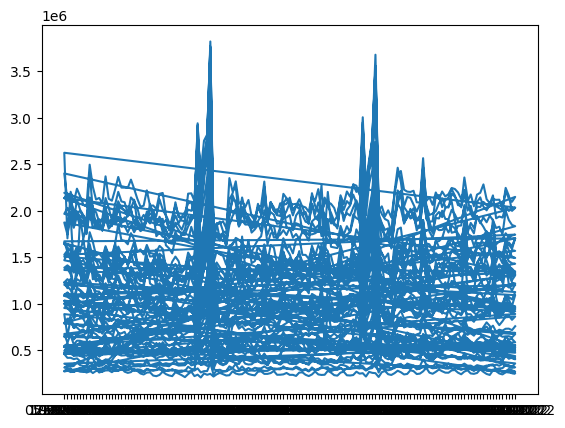

In [ ]:
#Lets plot the data

x=dataset['Date']
y =dataset['Weekly_Sales']
plt.plot(x,y)

In [ ]:
sns.set_style()

 ### seasonality

In [ ]:
plt.title('Weekly_sales')
sns.barplot(data=dataset.head(7), x='Date', y='Weekly_Sales');

NameError: ignored

### Patterns

###statistical measures to understand the central tendency of data

and dispersion of the data. Identify any external factors (holidays, promotions) that may impact demand.

###dispersion of the data.

 #### Identify any external factors (holidays, promotions) that may impact demand.

## Example of using TensorFlow to build and train a neural network for Walmart sales prediction

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

#Load Walmart sales dataset
data = pd.read_csv('/content/drive/MyDrive/ML/walmart/Walmart.csv')
data.head()




,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
#Preprocess the data
# .... Handale missing values
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
#convert date to number
#copy the dataset
walamrtdfraw = data.copy()
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date_num'] =data['Date'].dt.strftime('%d%m%y').astype(int)
data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_num
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,50210
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,120210
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,190210
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,260210
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,50310


In [ ]:
#Drop the old date since it not correct in form
data.drop('Date', axis=1, inplace=True)
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_num
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,50210
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,120210
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,190210
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,260210
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,50310


In [ ]:
data = data.rename(columns={'Date_num': 'Date'})

In [ ]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,50210
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,120210
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,190210
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,260210
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,50310


In [ ]:
walmartdf = data

In [ ]:
walmartdf.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,50210
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,120210
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,190210
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,260210
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,50310


In [ ]:
#Split the data into features and labels
X = walmartdf.drop('Weekly_Sales', axis=1)
y = walmartdf['Weekly_Sales']

In [ ]:
#Split the dataset into training data and test data
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, train_size=0.8, random_state=0)

In [ ]:
#Lets check how many rows we have in the training dataset and the raw dataset
print("The traning dataset contains", X_train.count(),"And the raw dataset contains", walmartdf.count())

The traning dataset contains Store           5148
Holiday_Flag    5148
Temperature     5148
Fuel_Price      5148
CPI             5148
Unemployment    5148
Date            5148
dtype: int64 And the raw dataset contains Store           6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
Date            6435
dtype: int64


In [ ]:
#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
#Build a simple miide
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow.keras import  Sequential, layers, models

model = models.Sequential([

        layers.Dense(128, input_dim= X_train_scaled.shape[1], activation='relu'),
        layers.Dense(1, activation='sigmoid')
        ])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train the model
model.fit(X_train_scaled,y_train, epochs=10, batch_size=32)

#Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
mse =  mean_squared_error(y_test, y_pred)
model.save('walmartmodel.h5')

print(f"Accuracy on test set:{mse}")








Epoch 1/10
161/161 [==============================] - 1s 2ms/step - loss: -3342081.7500 - accuracy: 0.0000e+00
Epoch 2/10
161/161 [==============================] - 0s 2ms/step - loss: -19136828.0000 - accuracy: 0.0000e+00
Epoch 3/10
161/161 [==============================] - 0s 2ms/step - loss: -54448672.0000 - accuracy: 0.0000e+00
Epoch 4/10
161/161 [==============================] - 0s 1ms/step - loss: -111375768.0000 - accuracy: 0.0000e+00
Epoch 5/10
161/161 [==============================] - 0s 2ms/step - loss: -189468160.0000 - accuracy: 0.0000e+00
Epoch 6/10
161/161 [==============================] - 0s 2ms/step - loss: -286733152.0000 - accuracy: 0.0000e+00
Epoch 7/10
161/161 [==============================] - 0s 2ms/step - loss: -401602912.0000 - accuracy: 0.0000e+00
Epoch 8/10
161/161 [==============================] - 0s 1ms/step - loss: -533271968.0000 - accuracy: 0.0000e+00
Epoch 9/10
161/161 [==============================] - 0s 2ms/step - loss: -680323776.0000 - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Now, Sequential and Dense are imported directly from tensorflow.keras.models and tensorflow.keras.layers. I appreciate your patience and thank you for bringing this to my attention

In [ ]:
#Build the model using tensorflow
import tensoflow as tf
model = tf.

import tensoflow as tf

# prompt: explain  item based filtering for movie dataset and  provide code for it

Item-based filtering is a collaborative filtering technique used to recommend items to users based on the similarity between items. In the context of a movie dataset, item-based filtering works as follows:

1. **Calculate the similarity between items:**
   - Compute the similarity between each pair of items based on their ratings. This can be done using various similarity measures such as Pearson correlation or cosine similarity.
   - Store the similarity values in a matrix.

2. **Predict the rating for an item:**
   - For a user who has rated some items, predict the rating for an item they haven't rated yet.
   - To do this, find the most similar items to the unrated item based on the similarity matrix.
   - Calculate the weighted average of the ratings of the similar items, where the weights are the similarity values.

Here is an example of how to implement item-based filtering for a movie dataset using Python:
